In [1]:
import pandas as pd
import numpy as np

In [269]:
df = pd.read_csv('/Users/amateos/Downloads/Data-Collisions.csv')

df.head()

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [270]:
# Checking if there are values with severity code that is not 2 or 1

df.loc[(df['SEVERITYCODE'] != 2) & (df['SEVERITYCODE'] != 1)]

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR


In [271]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [4]:
# Ok so all values are SEVERITYCODE 2 or 1 

In [5]:
# Let's count the number of NAs in each column:

missing_values = df.isna().sum().sort_values(ascending = False)
missing_values

PEDROWNOTGRNT     190006
EXCEPTRSNDESC     189035
SPEEDING          185340
INATTENTIONIND    164868
INTKEY            129603
EXCEPTRSNCODE     109862
SDOTCOLNUM         79737
JUNCTIONTYPE        6329
Y                   5334
X                   5334
LIGHTCOND           5170
WEATHER             5081
ROADCOND            5012
ST_COLDESC          4904
COLLISIONTYPE       4904
UNDERINFL           4884
LOCATION            2677
ADDRTYPE            1926
ST_COLCODE            18
INCKEY                 0
STATUS                 0
REPORTNO               0
COLDETKEY              0
OBJECTID               0
HITPARKEDCAR           0
PEDCYLCOUNT            0
SEVERITYCODE.1         0
SEVERITYDESC           0
PERSONCOUNT            0
PEDCOUNT               0
CROSSWALKKEY           0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
SDOT_COLCODE           0
SDOT_COLDESC           0
SEGLANEKEY             0
SEVERITYCODE           0
dtype: int64

In [6]:
missing_values_pct = missing_values/len(df)
missing_values_pct

PEDROWNOTGRNT     0.976026
EXCEPTRSNDESC     0.971039
SPEEDING          0.952058
INATTENTIONIND    0.846897
INTKEY            0.665747
EXCEPTRSNCODE     0.564341
SDOTCOLNUM        0.409595
JUNCTIONTYPE      0.032511
Y                 0.027400
X                 0.027400
LIGHTCOND         0.026557
WEATHER           0.026100
ROADCOND          0.025746
ST_COLDESC        0.025191
COLLISIONTYPE     0.025191
UNDERINFL         0.025088
LOCATION          0.013751
ADDRTYPE          0.009894
ST_COLCODE        0.000092
INCKEY            0.000000
STATUS            0.000000
REPORTNO          0.000000
COLDETKEY         0.000000
OBJECTID          0.000000
HITPARKEDCAR      0.000000
PEDCYLCOUNT       0.000000
SEVERITYCODE.1    0.000000
SEVERITYDESC      0.000000
PERSONCOUNT       0.000000
PEDCOUNT          0.000000
CROSSWALKKEY      0.000000
VEHCOUNT          0.000000
INCDATE           0.000000
INCDTTM           0.000000
SDOT_COLCODE      0.000000
SDOT_COLDESC      0.000000
SEGLANEKEY        0.000000
S

In [7]:
missing_values_pct[missing_values_pct > 0.1]

PEDROWNOTGRNT     0.976026
EXCEPTRSNDESC     0.971039
SPEEDING          0.952058
INATTENTIONIND    0.846897
INTKEY            0.665747
EXCEPTRSNCODE     0.564341
SDOTCOLNUM        0.409595
dtype: float64

In [8]:
# Drop these columns:

df = df.drop(['PEDROWNOTGRNT', 
              'EXCEPTRSNDESC', 
              'SPEEDING', 
              'INATTENTIONIND', 
              'INTKEY', 
              'EXCEPTRSNCODE', 
              'SDOTCOLNUM'], axis = 1)

In [9]:
# Now check again number of NaN values:

df.isna().sum().sort_values(ascending = False)

JUNCTIONTYPE      6329
Y                 5334
X                 5334
LIGHTCOND         5170
WEATHER           5081
ROADCOND          5012
COLLISIONTYPE     4904
ST_COLDESC        4904
UNDERINFL         4884
LOCATION          2677
ADDRTYPE          1926
ST_COLCODE          18
SEVERITYCODE.1       0
OBJECTID             0
INCKEY               0
COLDETKEY            0
REPORTNO             0
STATUS               0
HITPARKEDCAR         0
PEDCYLCOUNT          0
SEVERITYDESC         0
PERSONCOUNT          0
PEDCOUNT             0
CROSSWALKKEY         0
VEHCOUNT             0
INCDATE              0
INCDTTM              0
SDOT_COLCODE         0
SDOT_COLDESC         0
SEGLANEKEY           0
SEVERITYCODE         0
dtype: int64

In [10]:
df.shape

(194673, 31)

In [11]:
# Maximise the number of columns we can see
pd.set_option('display.max_columns', 500)

In [12]:
# Visualise the dataframe to drop the columns that do not add value
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,5TH AVE NE AND NE 103RD ST,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle,0,0,N


In [13]:
# Checking if there are values with SEVERITYCODE.1 code that is not 2 or 1

df.loc[(df['SEVERITYCODE.1'] != 2) & (df['SEVERITYCODE.1'] != 1)]

#OK there are none

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,LOCATION,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR


### Drop columns: OBJECTID, INCKEY etc. which do not add value

* OBJECTID: ESRI unique identifier 
* INCKEY: A unique key for the incident
* COLDETKEY: Secondary key for the incident 
* REPORTNO: (number of the report? - no description in metadata)
* STATUS: (status? - no description in metadata)
* LOCATION: Description of the general location of the collision - We have latitude and longitude which can give us more information than what LOCATION variable does
* SEVERITYCODE.1: same info as SEVERITYCODE
* SDOT_COLCODE: A code given to the collision by SDOT.
* SEGLANEKEY: A key for the lane segment in which the collision occurred.
* CROSSWALKKEY: A key for the crosswalk at which the collision occurred.

These variables do not add much info so we will exclude them.

In [14]:
# Drop these columns:

df = df.drop(['OBJECTID', 
              'INCKEY', 
              'COLDETKEY', 
              'REPORTNO', 
              'STATUS', 
              'LOCATION', 
              'SEVERITYCODE.1',
             'SDOT_COLCODE',
             'SEGLANEKEY',
             'CROSSWALKKEY'], axis = 1)

df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Overcast,Wet,Daylight,10,Entering at angle,N
1,1,-122.347294,47.647172,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,-122.334540,47.607871,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,Overcast,Dry,Daylight,32,One parked--one moving,N
3,1,-122.334803,47.604803,Block,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",N,Clear,Dry,Daylight,23,From same direction - all others,N
4,2,-122.306426,47.545739,Intersection,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,Raining,Wet,Daylight,10,Entering at angle,N


In [15]:
# Now check again number of NaN values:

df.isna().sum().sort_values(ascending = False)

JUNCTIONTYPE     6329
X                5334
Y                5334
LIGHTCOND        5170
WEATHER          5081
ROADCOND         5012
ST_COLDESC       4904
COLLISIONTYPE    4904
UNDERINFL        4884
ADDRTYPE         1926
ST_COLCODE         18
HITPARKEDCAR        0
PERSONCOUNT         0
SEVERITYDESC        0
INCDATE             0
PEDCOUNT            0
PEDCYLCOUNT         0
VEHCOUNT            0
INCDTTM             0
SDOT_COLDESC        0
SEVERITYCODE        0
dtype: int64

In [16]:
# Because we have 194 673 rows, we can afford droping the 1000s of rows that have at least one NaN.
# Now we have 180 067 rows

df = df.dropna()
df.shape

(180067, 21)

In [17]:
# Now check again number of NaN values:

df.isna().sum().sort_values(ascending = False)

HITPARKEDCAR     0
VEHCOUNT         0
X                0
Y                0
ADDRTYPE         0
SEVERITYDESC     0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
INCDATE          0
ST_COLDESC       0
INCDTTM          0
JUNCTIONTYPE     0
SDOT_COLDESC     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
SEVERITYCODE     0
dtype: int64

In [273]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Let's drop further columns:

* JUNCTIONTYPE gives the same information as ADDRTYPE so we can drop it
* SEVERITYDESC gives the same information as SEVERITYCODE so we can drop it
* ST_COLDESC gives the same information as COLLISIONTYPE so we can drop it
* HITPARKEDCAR gives the same information as COLLISIONTYPE so we can drop it


In [274]:
# Drop these columns:

df = df.drop(['JUNCTIONTYPE', 
              'SEVERITYDESC', 
              'ST_COLDESC', 
              'HITPARKEDCAR'], axis = 1)

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,0,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,0,0
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,0,0
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,0,0
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,0,0


In [275]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
dtype: object

In [276]:
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [277]:
# So N = 0 and Y = 1. To standardise and have everything as 1s and 0s change replace the values:

df[df['UNDERINFL'] == 'Y'].head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY
110,1,-122.289280,47.690198,126,1111,1111,3502001,Matched,Intersection,37950.0,36TH AVE NE AND NE 85TH ST,,NaN,1,Parked Car,4,0,0,4,2013/03/26 00:00:00+00,3/26/2013 6:31:00 PM,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,Y,Clear,Dry,Dusk,NaN,NaN,NaN,32,0,0
124,2,-122.322187,47.618733,141,1135,1135,3605976,Matched,Intersection,29069.0,HARVARD AVE AND E DENNY WAY,,NaN,2,Angles,2,0,0,2,2013/03/29 00:00:00+00,3/29/2013 4:34:00 PM,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,Y,Clear,Dry,Daylight,NaN,NaN,Y,10,0,0
158,2,-122.344721,47.682669,180,1115,1115,3503039,Matched,Block,NaN,WINONA AVE N BETWEEN N 74TH ST AND AURORA AVE N,,NaN,2,Parked Car,2,0,0,2,2013/03/29 00:00:00+00,3/29/2013 5:42:00 PM,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,Y,Clear,Dry,Daylight,NaN,NaN,NaN,32,0,0
200,1,-122.374278,47.655362,225,1265,1265,3643906,Matched,Block,NaN,W NICKERSON ST BETWEEN 13TH AVE W AND 14TH AVE W,,NaN,1,Other,1,0,0,1,2013/03/31 00:00:00+00,3/31/2013 11:19:00 PM,28,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,Y,Clear,Dry,Dark - Street Lights On,NaN,NaN,NaN,50,0,0
227,1,-122.351646,47.617584,259,1151,1151,3598980,Matched,Intersection,29666.0,2ND AVE AND BROAD ST,,NaN,1,Angles,3,0,0,2,2013/03/29 00:00:00+00,3/29/2013 9:40:00 PM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,Y,Clear,Dry,Dark - Street Lights On,NaN,NaN,NaN,10,0,0


In [278]:
# Replaced values of N and Y in the UNDERINFL column with 0 and 1 respectively:
df['UNDERINFL'] = df['UNDERINFL'].replace(['N'], 0)
df[df['UNDERINFL'] == 'N'].head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY


In [279]:
df['UNDERINFL'] = df['UNDERINFL'].replace(['Y'], 1)
df[df['UNDERINFL'] == 'Y'].head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY


In [280]:
df['UNDERINFL'].value_counts()

0    100274
0     80394
1      5126
1      3995
Name: UNDERINFL, dtype: int64

In [281]:
df[df['UNDERINFL'] == '0'].shape

(80394, 34)

In [282]:
df[df['UNDERINFL'] == 0].shape

(100274, 34)

In [283]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
dtype: object

In [284]:
# Some of the UNDERINFL values are strings, other are integers. Let's make the all integers

df['UNDERINFL'] = df['UNDERINFL'].replace(['0'], 0)
df['UNDERINFL'] = df['UNDERINFL'].replace(['1'], 1)
df['UNDERINFL'].value_counts()

0.0    180668
1.0      9121
Name: UNDERINFL, dtype: int64

In [285]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Overcast,Wet,Daylight,NaN,NaN,NaN,10,0,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0.0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,0,0
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0.0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,0,0
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Clear,Dry,Daylight,NaN,NaN,NaN,23,0,0
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,0,0


In [286]:
# Let's make the datetime changes so that we have day, month, hour etc. in separate columns

import datetime

# import datetime class from datetime module
from datetime import datetime

# INCDTTM is in the format MM/DD/YYYY H:MM:SS and let's change to datetime format

df['INCDTTM'] = pd.to_datetime(df.INCDTTM)
df.head()

# Now we can see INCDTTM has a much more usable time date format (e.g. 2013-03-27 14:54:00, instead of
# 3/27/2013 2:54:00 PM)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Angles,2,0,0,2,2013/03/27 00:00:00+00,2013-03-27 14:54:00,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Overcast,Wet,Daylight,NaN,NaN,NaN,10,0,0
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,2006-12-20 18:55:00,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0.0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,0,0
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,2004-11-18 10:20:00,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0.0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,0,0
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Other,3,0,0,3,2013/03/29 00:00:00+00,2013-03-29 09:26:00,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Clear,Dry,Daylight,NaN,NaN,NaN,23,0,0
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Angles,2,0,0,2,2004/01/28 00:00:00+00,2004-01-28 08:04:00,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,0,0


In [287]:
# Extract year, month, day, hour, and minute. Assign all these date component to new column.
df['year'] = df['INCDTTM'].dt.year
df['month'] = df['INCDTTM'].dt.month
df['day'] = df['INCDTTM'].dt.day
df['hour'] = df['INCDTTM'].dt.hour
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,year,month,day,hour
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Angles,2,0,0,2,2013/03/27 00:00:00+00,2013-03-27 14:54:00,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Overcast,Wet,Daylight,NaN,NaN,NaN,10,0,0,2013,3,27,14
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,2006-12-20 18:55:00,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0.0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,0,0,2006,12,20,18
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,2004-11-18 10:20:00,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0.0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,0,0,2004,11,18,10
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Other,3,0,0,3,2013/03/29 00:00:00+00,2013-03-29 09:26:00,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Clear,Dry,Daylight,NaN,NaN,NaN,23,0,0,2013,3,29,9
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Angles,2,0,0,2,2004/01/28 00:00:00+00,2004-01-28 08:04:00,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,0,0,2004,1,28,8


In [288]:
# Now add: day of the week: e.g. was it a friday or a wednesday?
# Convert month number e.g. 3 into string (March)

df['dayofweek'] = df['INCDTTM'].dt.day_name()
df['month_name'] = df['INCDTTM'].dt.month_name()

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,year,month,day,hour,dayofweek,month_name
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Angles,2,0,0,2,2013/03/27 00:00:00+00,2013-03-27 14:54:00,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Overcast,Wet,Daylight,NaN,NaN,NaN,10,0,0,2013,3,27,14,Wednesday,March
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,2006-12-20 18:55:00,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0.0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,0,0,2006,12,20,18,Wednesday,December
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,2004-11-18 10:20:00,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0.0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,0,0,2004,11,18,10,Thursday,November
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Other,3,0,0,3,2013/03/29 00:00:00+00,2013-03-29 09:26:00,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Clear,Dry,Daylight,NaN,NaN,NaN,23,0,0,2013,3,29,9,Friday,March
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Angles,2,0,0,2,2004/01/28 00:00:00+00,2004-01-28 08:04:00,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,0,0,2004,1,28,8,Wednesday,January


In [289]:
# Now we can drop as well the INCDATE and INCDTTM columns:

df = df.drop(['INCDATE',
             'INCDTTM'], axis=1)

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,year,month,day,hour,dayofweek,month_name
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Angles,2,0,0,2,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Overcast,Wet,Daylight,NaN,NaN,NaN,10,0,0,2013,3,27,14,Wednesday,March
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Sideswipe,2,0,0,2,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0.0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,0,0,2006,12,20,18,Wednesday,December
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Parked Car,4,0,0,3,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0.0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,0,0,2004,11,18,10,Thursday,November
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Other,3,0,0,3,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Clear,Dry,Daylight,NaN,NaN,NaN,23,0,0,2013,3,29,9,Friday,March
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Angles,2,0,0,2,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0.0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,0,0,2004,1,28,8,Wednesday,January


In [290]:
# Actually let's drop SDOT_COLDESC too as it's not adding much information and it's a lot of text

df = df.drop(['SDOT_COLDESC'], axis=1)

df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,year,month,day,hour,dayofweek,month_name
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Angles,2,0,0,2,11,NaN,0.0,Overcast,Wet,Daylight,NaN,NaN,NaN,10,0,0,2013,3,27,14,Wednesday,March
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Sideswipe,2,0,0,2,16,NaN,0.0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,0,0,2006,12,20,18,Wednesday,December
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Parked Car,4,0,0,3,14,NaN,0.0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,0,0,2004,11,18,10,Thursday,November
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Other,3,0,0,3,11,NaN,0.0,Clear,Dry,Daylight,NaN,NaN,NaN,23,0,0,2013,3,29,9,Friday,March
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Angles,2,0,0,2,11,NaN,0.0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,0,0,2004,1,28,8,Wednesday,January


In [291]:
# Data visualization libraries:

import seaborn as sns
import matplotlib.pyplot as plt

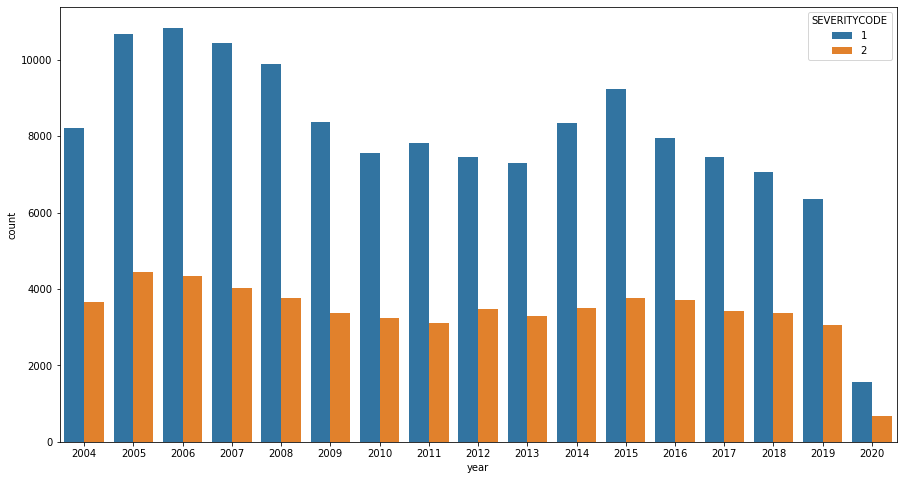

In [292]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="year", hue = 'SEVERITYCODE', data=df)

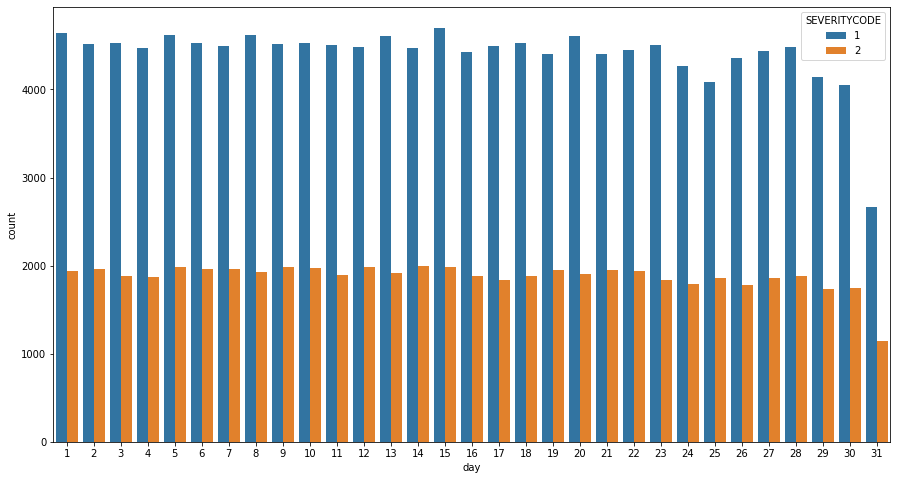

In [293]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="day", hue = 'SEVERITYCODE', data=df)

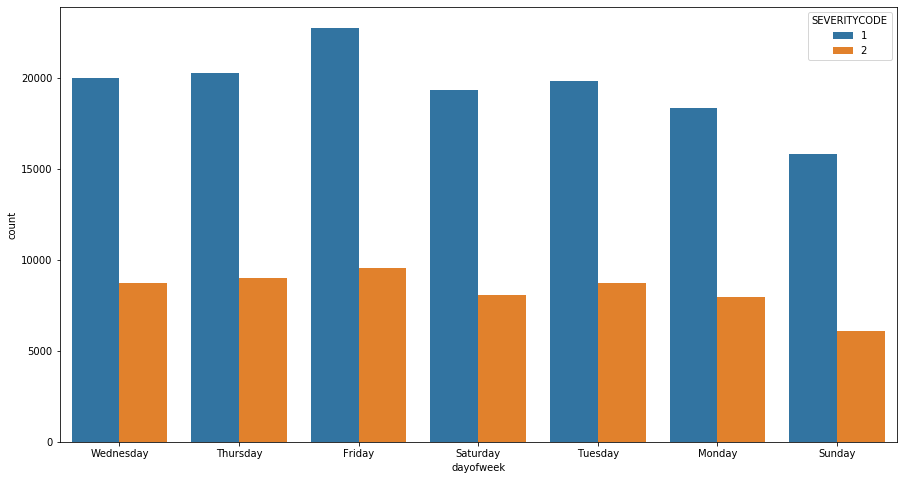

In [294]:
# More accidents on a Friday. Least on a Sunday:

plt.figure(figsize=(15,8))
ax = sns.countplot(x="dayofweek", hue = 'SEVERITYCODE', data=df)

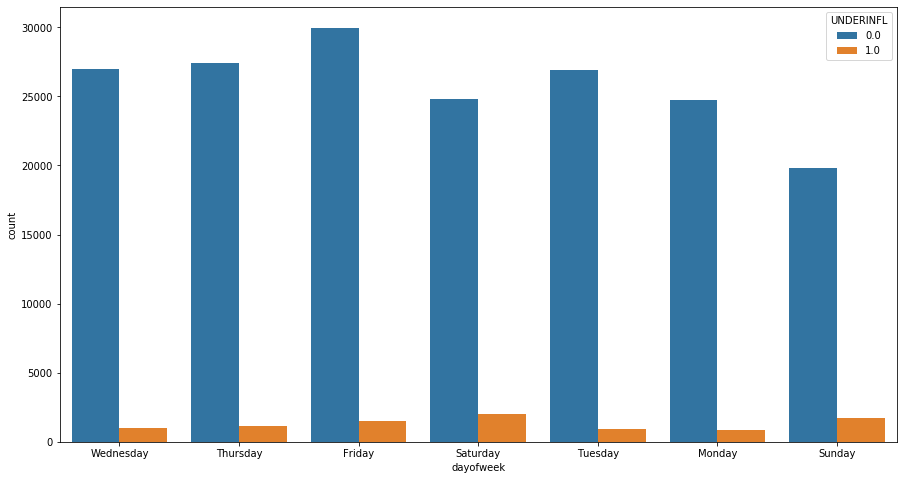

In [297]:
# More accidents on a Friday. Least on a Sunday:

plt.figure(figsize=(15,8))
ax = sns.countplot(x="dayofweek", hue = 'UNDERINFL', data=df)

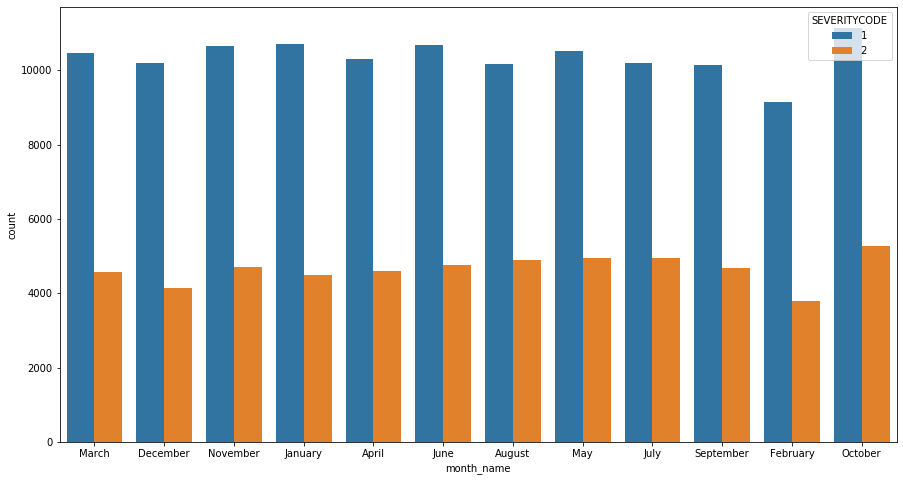

In [40]:
# More accidents in October: less light, colder, and Halloween? (so alcohol is an influence)

plt.figure(figsize=(15,8))
ax = sns.countplot(x="month_name", hue = 'SEVERITYCODE', data=df)

In [306]:
# Let's dig into why October is the month with most accidents:

df_october = df.loc[(df['month_name'] == 'October')]

In [314]:
# Most accidents happen in the "Halloween" period: 28th, 30th, 31st of October

df_october['day'].value_counts()

28    639
30    634
31    632
5     613
17    596
15    594
4     592
26    591
27    586
16    585
7     583
10    580
18    578
3     577
24    577
25    575
19    575
8     574
22    565
23    563
13    557
2     555
6     552
20    547
9     546
14    545
29    542
21    535
1     531
11    530
12    519
Name: day, dtype: int64

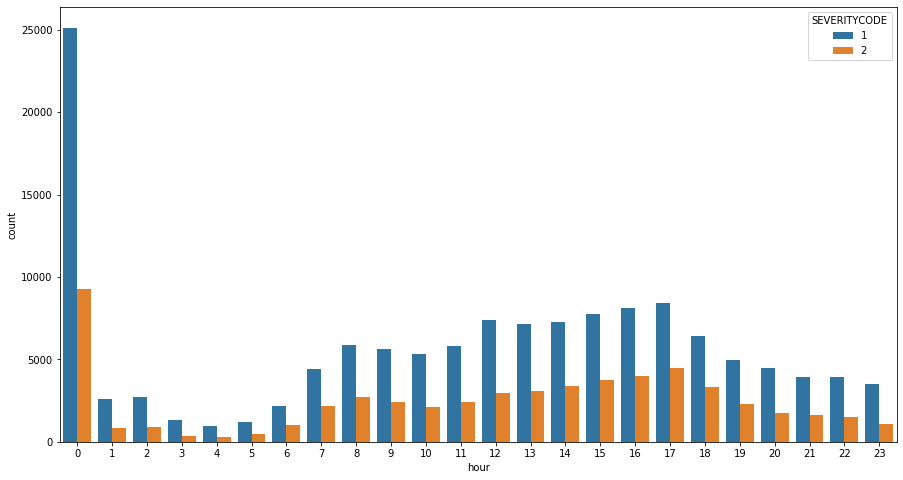

In [315]:
# More accidents in October: less light, colder, and Halloween? (so alcohol is an influence)

plt.figure(figsize=(15,8))
ax = sns.countplot(x="hour", hue = 'SEVERITYCODE', data=df)

In [328]:
df[0:1]

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,year,month,day,hour,dayofweek,month_name
0,2,-122.323148,47.70314,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Angles,2,0,0,2,11,NaN,0.0,Overcast,Wet,Daylight,NaN,NaN,NaN,10,0,0,2013,3,27,14,Wednesday,March


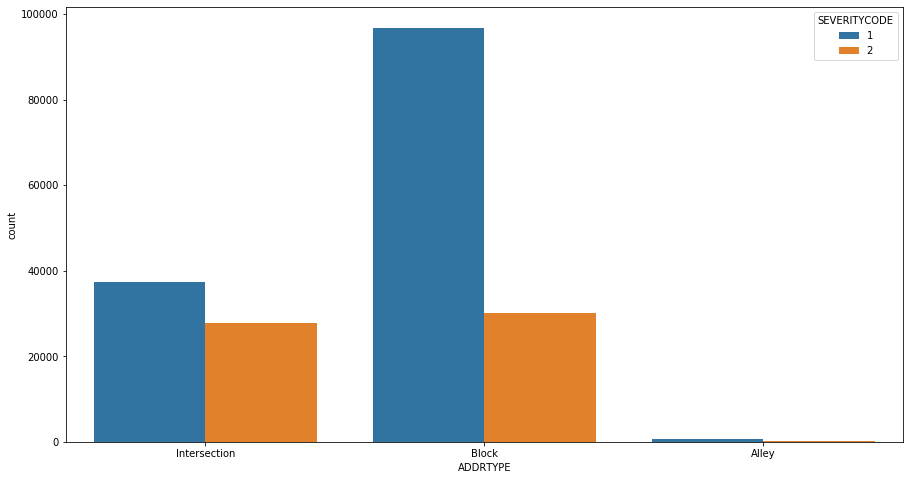

In [329]:
# More accidents happen in a block:

plt.figure(figsize=(15,8))
ax = sns.countplot(x="ADDRTYPE", hue = 'SEVERITYCODE', data=df)

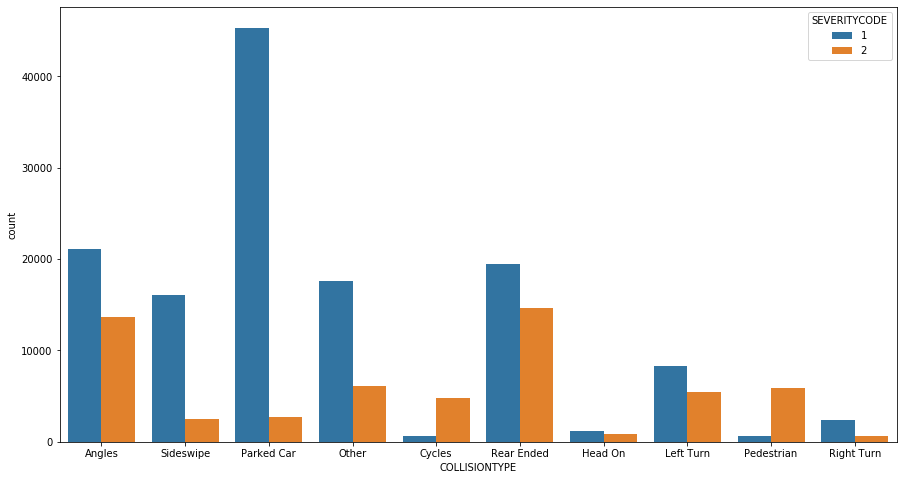

In [330]:
# More accidents involve a parked car but Rear End collisions tend to be the most severe ones:

plt.figure(figsize=(15,8))
ax = sns.countplot(x="COLLISIONTYPE", hue = 'SEVERITYCODE', data=df)

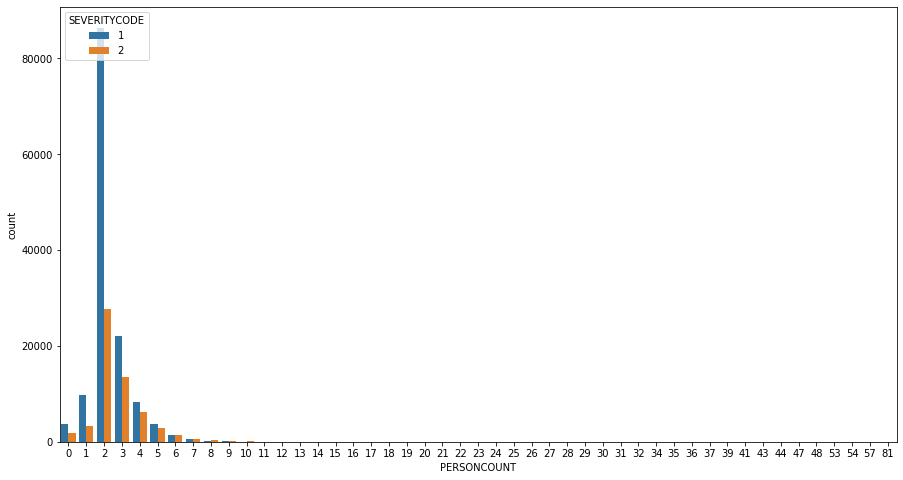

In [331]:
# More accidents involve a parked car but Rear End collisions tend to be the most severe ones:

plt.figure(figsize=(15,8))
ax = sns.countplot(x="PERSONCOUNT", hue = 'SEVERITYCODE', data=df)

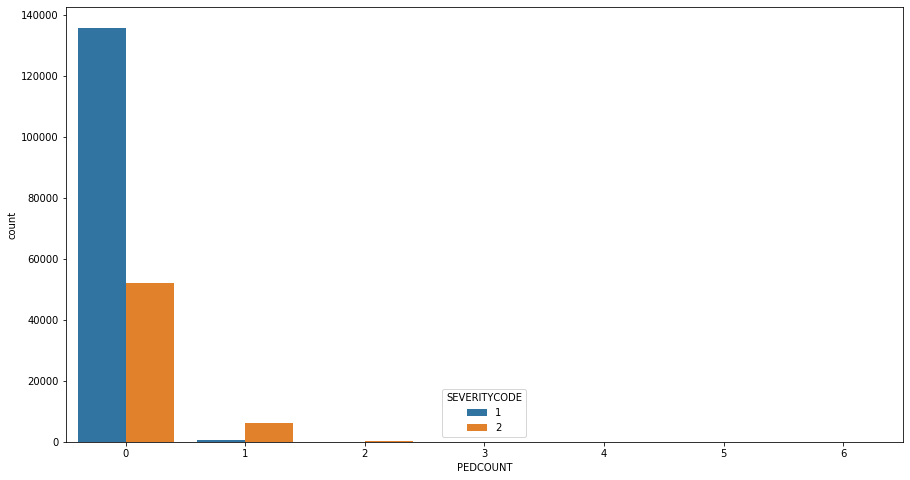

In [332]:
# More accidents do not involve a pedestrian, but when they do they tend to be the most severe accidents:

plt.figure(figsize=(15,8))
ax = sns.countplot(x="PEDCOUNT", hue = 'SEVERITYCODE', data=df)

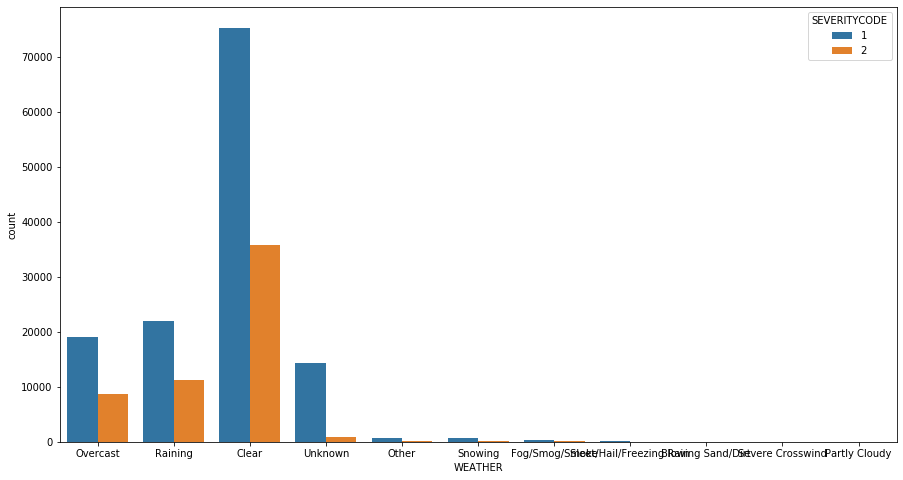

In [333]:
# Most accidents actually happen on clear skies
plt.figure(figsize=(15,8))
ax = sns.countplot(x="WEATHER", hue = 'SEVERITYCODE', data=df)

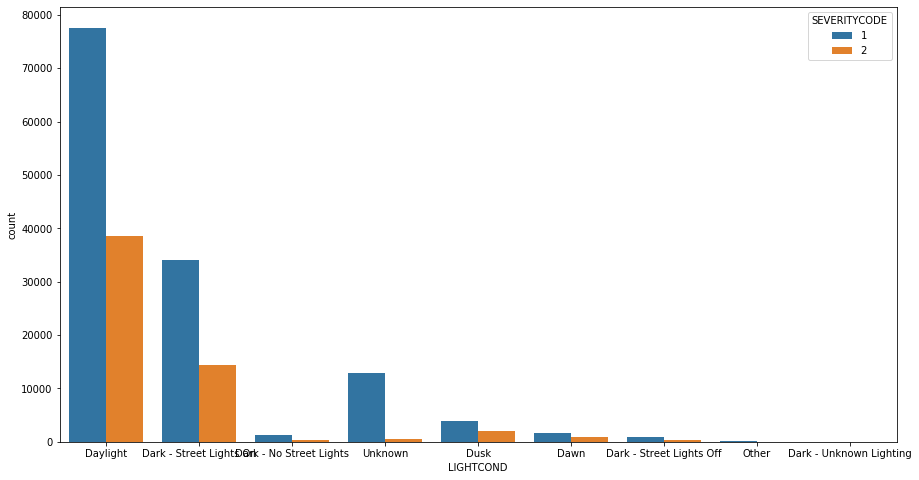

In [334]:
# Most accidents actually happen in daylight
plt.figure(figsize=(15,8))
ax = sns.countplot(x="LIGHTCOND", hue = 'SEVERITYCODE', data=df)

In [41]:
# So not real trend that we can find given the year and day of the month

In [ ]:
# Now do geospatial analysis with folium 

In [316]:
import folium

In [ ]:
# Due to costly computing effort to geovisualise where the 180000 accidents are happening, let's leave it to later on
# when we do employ our ML model 2

## Exploratory Data Analysis up to here

## Prepping dataset for Machine Learning starts here

* Change names of observations e.g. Severe Crosswind --> Crosswind
* Create dummy variables

In [42]:
df['ADDRTYPE'].value_counts()

Block           117085
Intersection     62982
Name: ADDRTYPE, dtype: int64

In [43]:
df['COLLISIONTYPE'].value_counts()

Parked Car    42886
Angles        34353
Rear Ended    32778
Other         21907
Sideswipe     17862
Left Turn     13586
Pedestrian     6481
Cycles         5334
Right Turn     2901
Head On        1979
Name: COLLISIONTYPE, dtype: int64

In [44]:
df['WEATHER'].value_counts()

Clear                       107692
Raining                      31719
Overcast                     26809
Unknown                      11505
Snowing                        875
Other                          728
Fog/Smog/Smoke                 549
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                24
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [45]:
df['ROADCOND'].value_counts()

Dry               120629
Wet                45597
Unknown            11384
Ice                 1161
Snow/Slush           971
Other                115
Standing Water        99
Sand/Mud/Dirt         62
Oil                   49
Name: ROADCOND, dtype: int64

### Now create dummy variables so that we only have numbers in our columns:

E.g. 

* ADDRTYPE = Block_ADDRTYPE , Intersection_ADDRTYPE etc.

In [46]:
# Create dummies buy one-hot encoding (https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python)

pd.get_dummies(df['ADDRTYPE'])

,Block,Intersection
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
194668,1,0
194669,1,0
194670,0,1
194671,0,1


In [47]:
ADDRTYPE_dummies = pd.get_dummies(df['ADDRTYPE'])
df = pd.concat([df, ADDRTYPE_dummies], axis=1)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block,Intersection
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,0,Overcast,Wet,Daylight,10,2013,3,27,14,Wednesday,March,0,1
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,0,Raining,Wet,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,0,Overcast,Dry,Daylight,32,2004,11,18,10,Thursday,November,1,0
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,0,Clear,Dry,Daylight,23,2013,3,29,9,Friday,March,1,0
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,0,Raining,Wet,Daylight,10,2004,1,28,8,Wednesday,January,0,1


In [48]:
# Now rename column name in Pandas so that we don't forget where the dummies came from
# e.g. Block and Intersection come from ADDRTYPE, so let's rename to Block_ADDRTYPE

df.rename({'Block': 'Block_ADDRTYPE', 'Intersection': 'Intersection_ADDRTYPE'}, axis=1, inplace=True)
df.head()


,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,0,Overcast,Wet,Daylight,10,2013,3,27,14,Wednesday,March,0,1
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,0,Raining,Wet,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,0,Overcast,Dry,Daylight,32,2004,11,18,10,Thursday,November,1,0
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,0,Clear,Dry,Daylight,23,2013,3,29,9,Friday,March,1,0
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,0,Raining,Wet,Daylight,10,2004,1,28,8,Wednesday,January,0,1


In [49]:
# Now we can drop ADDRTYPE fom the dataframe

df = df.drop(['ADDRTYPE'], axis=1)
df.head()

,SEVERITYCODE,X,Y,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE
0,2,-122.323148,47.703140,Angles,2,0,0,2,0,Overcast,Wet,Daylight,10,2013,3,27,14,Wednesday,March,0,1
1,1,-122.347294,47.647172,Sideswipe,2,0,0,2,0,Raining,Wet,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0
2,1,-122.334540,47.607871,Parked Car,4,0,0,3,0,Overcast,Dry,Daylight,32,2004,11,18,10,Thursday,November,1,0
3,1,-122.334803,47.604803,Other,3,0,0,3,0,Clear,Dry,Daylight,23,2013,3,29,9,Friday,March,1,0
4,2,-122.306426,47.545739,Angles,2,0,0,2,0,Raining,Wet,Daylight,10,2004,1,28,8,Wednesday,January,0,1


In [50]:
# Create dummy variables for COLLISIONTYPE

COLLISIONTYPE_dummies = pd.get_dummies(df['COLLISIONTYPE'])
df = pd.concat([df, COLLISIONTYPE_dummies], axis=1)
df.head()

,SEVERITYCODE,X,Y,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe
0,2,-122.323148,47.703140,Angles,2,0,0,2,0,Overcast,Wet,Daylight,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0
1,1,-122.347294,47.647172,Sideswipe,2,0,0,2,0,Raining,Wet,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1
2,1,-122.334540,47.607871,Parked Car,4,0,0,3,0,Overcast,Dry,Daylight,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0
3,1,-122.334803,47.604803,Other,3,0,0,3,0,Clear,Dry,Daylight,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0
4,2,-122.306426,47.545739,Angles,2,0,0,2,0,Raining,Wet,Daylight,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0


In [51]:
# Now rename column name in Pandas so that we don't forget where the dummies came from

df.rename({'Angles': 'Angles_COLLISIONTYPE', 
           'Cycles': 'Cycles_COLLISIONTYPE', 
           'Head On': 'HeadOn_COLLISIONTYPE',
           'Left Turn':'LeftTurn_COLLISIONTYPE',
           'Other': 'Other_COLLISIONTYPE',
           'Parked Car': 'ParkedCar_COLLISIONTYPE',
           'Pedestrian': 'Pedestrian_COLLISIONTYPE',
           'Rear Ended': 'RearEnded_COLLISIONTYPE',
           'Right Turn': 'RightTurn_COLLISIONTYPE',
           'Sideswipe': 'Sideswipe_COLLISIONTYPE'
          }, 
          axis=1, inplace=True)
df.head()

,SEVERITYCODE,X,Y,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE
0,2,-122.323148,47.703140,Angles,2,0,0,2,0,Overcast,Wet,Daylight,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0
1,1,-122.347294,47.647172,Sideswipe,2,0,0,2,0,Raining,Wet,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1
2,1,-122.334540,47.607871,Parked Car,4,0,0,3,0,Overcast,Dry,Daylight,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0
3,1,-122.334803,47.604803,Other,3,0,0,3,0,Clear,Dry,Daylight,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0
4,2,-122.306426,47.545739,Angles,2,0,0,2,0,Raining,Wet,Daylight,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0


In [52]:
# Now we can drop COLLISIONTYPE fom the dataframe

df = df.drop(['COLLISIONTYPE'], axis=1)
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE
0,2,-122.323148,47.703140,2,0,0,2,0,Overcast,Wet,Daylight,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,Raining,Wet,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1
2,1,-122.334540,47.607871,4,0,0,3,0,Overcast,Dry,Daylight,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,Clear,Dry,Daylight,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,Raining,Wet,Daylight,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0


In [53]:
# Create dummy variables for WEATHER

WEATHER_dummies = pd.get_dummies(df['WEATHER'])
df = pd.concat([df, WEATHER_dummies], axis=1)
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,2,-122.323148,47.703140,2,0,0,2,0,Overcast,Wet,Daylight,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,Raining,Wet,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,Overcast,Dry,Daylight,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,Clear,Dry,Daylight,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,Raining,Wet,Daylight,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [54]:
# Now we can drop WEATHER fom the dataframe. We also drop Other, Unknown because they add no
# real valuable info

df = df.drop(['WEATHER',
             'Other',
             'Unknown'], axis=1)
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,ROADCOND,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing
0,2,-122.323148,47.703140,2,0,0,2,0,Wet,Daylight,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,Wet,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,Dry,Daylight,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,Dry,Daylight,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,Wet,Daylight,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [55]:
# Now rename column name in Pandas so that we don't forget where the dummies came from

df.rename({'Blowing Sand/Dirt': 'Sand_WEATHER', 
           'Clear': 'Clear_WEATHER', 
           'Fog/Smog/Smoke': 'Fog_WEATHER',
           'Overcast': 'Overcast_WEATHER',
           'Partly Cloudy': 'Cloudy_WEATHER',
           'Raining': 'Raining_WEATHER',
           'Severe Crosswind': 'Crosswind_WEATHER',
           'Sleet/Hail/Freezing Rain': 'Sleet_WEATHER',
           'Snowing': 'Snowing_WEATHER'
          }, 
          axis=1, inplace=True)
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,ROADCOND,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER
0,2,-122.323148,47.703140,2,0,0,2,0,Wet,Daylight,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,Wet,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,Dry,Daylight,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,Dry,Daylight,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,Wet,Daylight,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [56]:
# Now we can drop WEATHER fom the dataframe and other columns that give us no info such as Other_WEATHER

df.head()


,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,ROADCOND,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER
0,2,-122.323148,47.703140,2,0,0,2,0,Wet,Daylight,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,Wet,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,Dry,Daylight,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,Dry,Daylight,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,Wet,Daylight,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
# Now do the same but for ROADCOND
df['ROADCOND'].value_counts()

Dry               120629
Wet                45597
Unknown            11384
Ice                 1161
Snow/Slush           971
Other                115
Standing Water        99
Sand/Mud/Dirt         62
Oil                   49
Name: ROADCOND, dtype: int64

In [58]:
# Create dummy variables for ROADCOND

ROADCOND_dummies = pd.get_dummies(df['ROADCOND'])
df = pd.concat([df, ROADCOND_dummies], axis=1)
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,ROADCOND,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,2,-122.323148,47.703140,2,0,0,2,0,Wet,Daylight,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,-122.347294,47.647172,2,0,0,2,0,Wet,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,-122.334540,47.607871,4,0,0,3,0,Dry,Daylight,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,Dry,Daylight,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,Wet,Daylight,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
# Now we can drop ROADCOND fom the dataframe. We also drop Other, Unknown and Standing Water because they add no
# real valuable info

df = df.drop(['ROADCOND',
             'Other',
             'Unknown',
             'Standing Water'], axis=1)
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry,Ice,Oil,Sand/Mud/Dirt,Snow/Slush,Wet
0,2,-122.323148,47.703140,2,0,0,2,0,Daylight,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,-122.347294,47.647172,2,0,0,2,0,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,-122.334540,47.607871,4,0,0,3,0,Daylight,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,Daylight,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,Daylight,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [60]:
# Now rename column name in Pandas so that we don't forget where the dummies came from

df.rename({'Dry': 'Dry_ROADCOND', 
           'Ice': 'Ice_ROADCOND', 
           'Oil': 'Oil_ROADCOND',
           'Sand/Mud/Dirt':'Dirt_ROADCOND',
           'Snow/Slush': 'Snow_ROADCOND',
           'Wet': 'Wet_ROADCOND',
          }, 
          axis=1, inplace=True)
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND
0,2,-122.323148,47.703140,2,0,0,2,0,Daylight,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,-122.347294,47.647172,2,0,0,2,0,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,1,-122.334540,47.607871,4,0,0,3,0,Daylight,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,Daylight,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,Daylight,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [61]:
# Now do the same but for ROADCOND
df['LIGHTCOND'].value_counts()

Daylight                    112216
Dark - Street Lights On      46683
Unknown                      10340
Dusk                          5708
Dawn                          2389
Dark - No Street Lights       1418
Dark - Street Lights Off      1130
Other                          172
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [62]:
#Dark - No Street Lights and Dark - Street Lights Off are very similar things. Therefore, merge:

df['LIGHTCOND'].replace('Dark - No Street Lights', 'Dark - Street Lights Off', inplace = True)

In [63]:
# Now do the same but for ROADCOND
df['LIGHTCOND'].value_counts()

Daylight                    112216
Dark - Street Lights On      46683
Unknown                      10340
Dusk                          5708
Dark - Street Lights Off      2548
Dawn                          2389
Other                          172
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [64]:
# Create dummy variables for ROADCOND

LIGHTCOND_dummies = pd.get_dummies(df['LIGHTCOND'])
df = pd.concat([df, LIGHTCOND_dummies], axis=1)
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,LIGHTCOND,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,2,-122.323148,47.703140,2,0,0,2,0,Daylight,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,Dark - Street Lights On,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,Daylight,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,Daylight,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,Daylight,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [65]:
# Now we can drop LIGHTCOND fom the dataframe. We also drop Other, Unknown and Dark - Unknown Lighting because they 
# add no real valuable info

df = df.drop(['LIGHTCOND',
             'Dark - Unknown Lighting',
             'Other',
             'Unknown'], axis=1)
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk
0,2,-122.323148,47.703140,2,0,0,2,0,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,-122.347294,47.647172,2,0,0,2,0,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,-122.334803,47.604803,3,0,0,3,0,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2,-122.306426,47.545739,2,0,0,2,0,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [66]:
# Now rename column name in Pandas so that we don't forget where the dummies came from

df.rename({'Dark - Street Lights Off': 'Dark_NoStreetLights_LIGHTCOND', 
           'Dark - Street Lights On': 'Dark_YesStreetLights_LIGHTCOND', 
           'Dawn': 'Dawn_LIGHTCOND',
           'Daylight':'Daylight_LIGHTCOND',
           'Dusk': 'Dusk_LIGHTCOND'}, 
          axis=1, 
          inplace=True)

df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,year,month,day,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND
0,2,-122.323148,47.703140,2,0,0,2,0,10,2013,3,27,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,-122.347294,47.647172,2,0,0,2,0,11,2006,12,20,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,32,2004,11,18,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,-122.334803,47.604803,3,0,0,3,0,23,2013,3,29,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2,-122.306426,47.545739,2,0,0,2,0,10,2004,1,28,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [67]:
# Let's also drop the year column as we want our model to be able to be forward looking. i.e. predict in the future
# so no use having year as a column as 2021, 2022 etc. will not be in the available to our model.

# Also drop the month column as we have month_name column giving us the same info

# Also drop the day column as from exploratory data analysis (EDA) we haven't found a meaningful trend between day of 
# the month and the SEVERITYCODE and we have dayofweek as a more meaningful column.

df = df.drop(['year', 'month', 'day'], axis = 1)
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND
0,2,-122.323148,47.703140,2,0,0,2,0,10,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,-122.347294,47.647172,2,0,0,2,0,11,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,32,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,-122.334803,47.604803,3,0,0,3,0,23,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,2,-122.306426,47.545739,2,0,0,2,0,10,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [68]:
# Now create dummy variables for dayofweek and month_name

# Create dummy variables for ROADCOND

dayofweek_dummies = pd.get_dummies(df['dayofweek'])
df = pd.concat([df, dayofweek_dummies], axis=1)
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,2,-122.323148,47.703140,2,0,0,2,0,10,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,-122.347294,47.647172,2,0,0,2,0,11,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
2,1,-122.334540,47.607871,4,0,0,3,0,32,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,23,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,10,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [69]:
# Now create dummy variables for dayofweek and month_name

# Create dummy variables for ROADCOND

month_name_dummies = pd.get_dummies(df['month_name'])
df = pd.concat([df, month_name_dummies], axis=1)
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,hour,dayofweek,month_name,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,2,-122.323148,47.703140,2,0,0,2,0,10,14,Wednesday,March,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,11,18,Wednesday,December,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,32,10,Thursday,November,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,23,9,Friday,March,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,10,8,Wednesday,January,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [70]:
df = df.drop(['dayofweek',
             'month_name'], axis = 1)

df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,ST_COLCODE,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,2,-122.323148,47.703140,2,0,0,2,0,10,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,11,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,32,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,23,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,10,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [71]:
# Now do the same but for ROADCOND
df['ST_COLCODE'].value_counts()

32    23999
10    23189
14    16330
32    15409
10    11164
      ...  
60        1
87        1
43        1
87        1
43        1
Name: ST_COLCODE, Length: 114, dtype: int64

In [72]:
# Now do the same but for ROADCOND
df['ST_COLCODE'].value_counts().nunique()

94

In [73]:
# For the moment I'm also going to drop ST_COLCODE as there are 94 possible values and a lot of text
# see (https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)
# COLLISIONTYPE captures a lot of the information that ST_COLCODE conveys

df = df.drop(['ST_COLCODE'],
            axis = 1)

df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


### Also group hour into different groups:
### e.g. Morning encompasses the hours 7-11 (https://www.learnersdictionary.com/qa/parts-of-the-day-early-morning-late-morning-etc)

* Morning: 5 am to 12 pm
* Afternoon: 12 pm to 5 pm
* Evening: 5 pm to 9 pm
* Night: 9 pm to 4 am

In [74]:
import numpy as np

In [75]:
# Add a column to a pandas dataframe based on the values of another column:
# In this case our conditions are Morning = 4<time<13 etc. etc.
# from (https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/)

# create a list of our conditions
conditions = [
    (df['hour'] >= 5) & (df['hour'] <= 11),
    (df['hour'] >= 12) & (df['hour'] <= 16),
    (df['hour'] >= 17) & (df['hour'] <= 20),
    (df['hour'] >= 21) & (df['hour'] <= 4)
    ]

# create a list of the values we want to assign for each condition
values = ['Morning', 'Afternoon', 'Evening', 'Night']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Period'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,Period
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Afternoon
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,Evening
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Morning
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Morning
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Morning


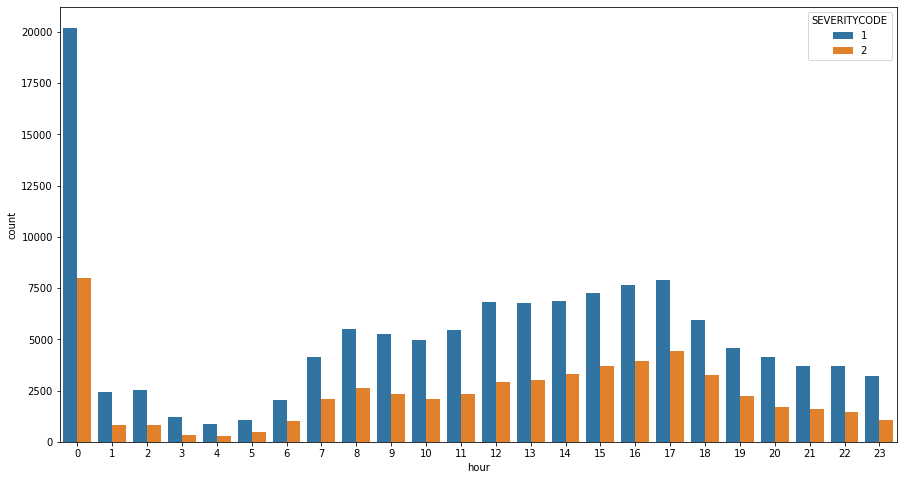

In [76]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="hour", hue = 'SEVERITYCODE', data=df)

In [77]:
df['Period'].value_counts()

0            52274
Afternoon    52232
Morning      41325
Evening      34236
Name: Period, dtype: int64

In [78]:
#Dark - No Street Lights and Dark - Street Lights Off are very similar things. Therefore, merge:

df['Period'].replace('0', 'Night', inplace = True)

In [79]:
df['Period'].value_counts()

Night        52274
Afternoon    52232
Morning      41325
Evening      34236
Name: Period, dtype: int64

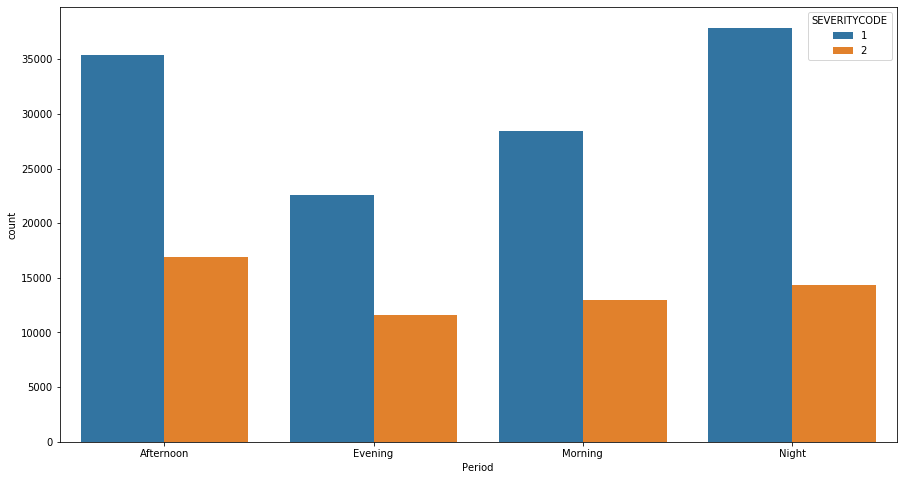

In [80]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Period", hue = 'SEVERITYCODE', data=df)

In [81]:
# Actually I prefer having the hour instead of the period as periods seems very similar to each other:

df = df.drop(['Period'], axis = 1)

In [82]:
df.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


## Two approaches to the Machine Learning:

## 1. Disregard location (X,Y): easier to do and can use all 180k rows
## 2. Use location but limit to 10000 rows max (As otherwise takes too much computing power to reverse geo-code 180k rows)

# Approach 1: Drop location

In [83]:
df_1 = df.drop(['X', 'Y'], axis = 1)
df_1.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,2,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [84]:
# Because SEVERITYCODE is the variable we are trying to predict and because we are going to use a logistic regression
# to predict if an accident is of type 1 or type 2 let's replace the values:


df_1['SEVERITYCODE'].replace(1,0, inplace = True)

df_1['SEVERITYCODE'].value_counts()

0    124258
2     55809
Name: SEVERITYCODE, dtype: int64

In [85]:
df_1['SEVERITYCODE'].replace(2,1, inplace = True)

df_1['SEVERITYCODE'].value_counts()

0    124258
1     55809
Name: SEVERITYCODE, dtype: int64

In [86]:
df_1.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,1,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [87]:
# Rename column name SEVERITYCODE to SEVERITYCODE2. As value = 1 signifies it is a SEVERITYCODE = 2 incident.

df_1.rename({'SEVERITYCODE': 'SEVERITYCODE_2'}, 
          axis=1, 
          inplace=True)

df_1.head()

,SEVERITYCODE_2,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,1,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


## * Logistic regression ML model: https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/

## Creating Training Data and Test Data:

In [88]:
# Creating Training Data and Test Data

# First, we need to divide our data into x values (the data we will be using to make predictions) and y values 
#(the data we are attempting to predict). The following code handles this:

y_data = df_1['SEVERITYCODE_2']

x_data = df_1.drop('SEVERITYCODE_2', axis = 1)

In [89]:
# Next, we need to import the train_test_split function from scikit-learn:

from sklearn.model_selection import train_test_split

In [90]:
# Lastly, we can use the train_test_split function combined with list unpacking to generate 
# our training data and test data:

# The test data is 30% of the original data set as specified with the parameter test_size = 0.3.

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)



## Training the Logistic Regression Model:

In [91]:
# Import the appropriate model from scikit-learn:

from sklearn.linear_model import LogisticRegression

In [92]:
# Create our model by instantiating an instance of the LogisticRegression object:

model = LogisticRegression()

In [93]:
# To train the model, call the fit method on the LogisticRegression object we just created 
# and pass in our x_training_data and y_training_data variables:

model.fit(x_training_data, y_training_data)

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
# Our model has now been trained. We will begin making predictions using this model:

## Making Predictions With Our Logistic Regression Model:

In [95]:
# Let’s make a set of predictions on our test data using the model logistic regression model we just created. 
# We will store these predictions in a variable called predictions:

predictions = model.predict(x_test_data)


## Measuring the Performance of our Logistic Regression Machine Learning Model:

In [96]:
# scikit-learn has an excellent built-in module called classification_report that makes it easy to measure 
# the performance of a classification machine learning model. 
#We will use this module to measure the performance of the model that we just created.

# Import the module classification_report:

from sklearn.metrics import classification_report


In [97]:
# Let’s use the module to calculate the performance metrics for our logistic regression machine learning module:

classification_report(y_test_data, predictions)


'              precision    recall  f1-score   support\n\n           0       0.75      0.95      0.84     37317\n           1       0.73      0.30      0.42     16704\n\n    accuracy                           0.75     54021\n   macro avg       0.74      0.62      0.63     54021\nweighted avg       0.74      0.75      0.71     54021\n'

In [98]:
# If you’re interested in seeing the raw confusion matrix and calculating the performance metrics manually, 
# you can do this with the following code:

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))


[[35454  1863]
 [11721  4983]]


In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [100]:
precision = precision_score(y_test_data, predictions)
recall = recall_score(y_test_data, predictions)
f1 = f1_score(y_test_data, predictions)

print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test_data, predictions)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test_data, predictions):.4f}")
print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

CONFUSION MATRIX:
[[35454  1863]
 [11721  4983]]
ACCURACY SCORE:
0.7485
CLASSIFICATION REPORT:
	Precision: 0.7279
	Recall: 0.2983
	F1_Score: 0.4232


* The **ACCURACY SCORE** value describes (number of points classified correctly) / (total number of points in your test set)

## Interpreting the confusion matrix:

First row: The negative class:
* 35454 were correctly classified as non-SEVERITYCODE_2 accidents. **True negatives**.
* Remaining 11721 were wrongly classified as SEVERITYCODE_2 accidents. **False positive**

Second row: The positive class:
* 1863 were incorrectly classified as non-SEVERITYCODE_2 accidents. **False negatives**
* 4983 were correctly classified SEVERITYCODE_2 accidents. **True positives**


**Precision** measures the accuracy of positive predictions. Also called the precision of the classifier ==> 72.79%

**Recall (Sensitivity or True Positive Rate)**: The ratio of positive instances that are correctly detected by the classifier. ==> 29.83%

**𝐹1** score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values. The  𝐹1  score favours classifiers that have similar precision and recall. ==> 42.32%

## Therefore our logistic ML model has been 74.9% accurate in predicting if an accident is of SEVERITYCODE = 1 or SEVERITYCODE = 2.

# Now let's do the reverse geo-coding approach for sample n = 1000

In [101]:
df

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,3,0,0,2,0,8,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
194669,1,-122.344526,47.690924,2,0,0,2,0,9,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
194670,2,-122.306689,47.683047,3,0,0,2,0,9,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
194671,2,-122.355317,47.678734,2,0,1,1,0,16,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


### So we have information about where the accidents are happening. We have the latitude and longitude and the location. But ideally we'd group the locations into less granular groups. So, for an accident in e.g. King Street, we can assign King Street into the neighbourhood 'Downtown'.

To do this we need to reverse geocoding. See:

https://towardsdatascience.com/reverse-geocoding-in-python-a915acf29eb6

In [102]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt
import plotly_express as px

In [111]:
# Let's create tne dataframe with the first 1000 rows

df_1000 = df[0:1000]

In [112]:
df_1000.head()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [113]:
# Rename column name SEVERITYCODE to SEVERITYCODE2. As value = 1 signifies it is a SEVERITYCODE = 2 incident.

df_1000.rename({'SEVERITYCODE': 'SEVERITYCODE_2'}, 
          axis=1, 
          inplace=True)

df_1000.head()

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SEVERITYCODE_2,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [106]:
locator = Nominatim(user_agent= 'myGeocoder')
coordinates = '47.703140, -122.323148'
location = locator.reverse(coordinates)
location.raw

{'place_id': 140159476,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 221258112,
 'lat': '47.7033299',
 'lon': '-122.3220510871665',
 'display_name': 'Thornton Creek Apartments, 514, Northeast 103rd Street, Licton Springs, Maple Leaf, Seattle, King County, Washington, 98125, United States of America',
 'address': {'building': 'Thornton Creek Apartments',
  'house_number': '514',
  'road': 'Northeast 103rd Street',
  'neighbourhood': 'Licton Springs',
  'suburb': 'Maple Leaf',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98125',
  'country': 'United States of America',
  'country_code': 'us'},
 'boundingbox': ['47.7032232', '47.703575', '-122.3225864', '-122.3219103']}

In [114]:
# To be able to use the Geocoder, we need to have a column with coordinates in the format Y,X.
# To do this we can map the two columns (X & Y) as strings and then concatenate with a comma between them:

df_1000['geom'] = df_1000['Y'].map(str) + ',' + df_1000['X'].map(str)
df_1000['geom'][0]

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


'47.70314032,-122.32314840000002'

### We create a service provider locator, with time pass timeout being 10 minutes since we have many rows. That will prevent timeout errors that you might encounter during the process.

In [115]:
locator = Nominatim(user_agent='myGeocoder', timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [116]:
import tqdm
from tqdm import tqdm, tqdm_notebook

tqdm_notebook().pandas()

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [117]:
# Now, we can reverse geocode by using applying the reverse geocoding rgeocode we created above.

df_1000['address'] = df_1000['geom'].progress_apply(rgeocode)
df_1000.head()

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SEVERITYCODE_2,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,geom,address
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,"47.70314032,-122.32314840000002","(Thornton Creek Apartments, 514, Northeast 103..."
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,"47.64717249,-122.3472943","(Aurora Bridge, Westlake Avenue North, Westlak..."
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"47.60787143,-122.33453999999999","(Financial Center, 1215, 4th Avenue, Central B..."
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"47.60480289,-122.3348033","(Henry M. Jackson Federal Building, 915, 2nd A..."
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,"47.54573946,-122.3064263","(6362, Swift Avenue South, Rainier Valley, Sea..."


In [118]:
# Let's check our new column:

df_1000['address']

0       (Thornton Creek Apartments, 514, Northeast 103...
1       (Aurora Bridge, Westlake Avenue North, Westlak...
2       (Financial Center, 1215, 4th Avenue, Central B...
3       (Henry M. Jackson Federal Building, 915, 2nd A...
4       (6362, Swift Avenue South, Rainier Valley, Sea...
                              ...                        
1103    (2112, Northeast 75th Street, Wedgwood, Seattl...
1104    (810, Harrison Street, South Lake Union, Bellt...
1105    (Abby Rose, 1917, Eastlake Avenue East, Eastla...
1106    (750, South Dearborn Street, West Edge, Intern...
1107    (4617, 36th Avenue Southwest, Morgan Junction,...
Name: address, Length: 1000, dtype: object

In [119]:
# Export df_10000 so that we always have it and don't need to run the code #df_10000['address'] = df_10000['geom'].progress_apply(rgeocode)

df_1000.to_excel('/Users/amateos/Documents/1000 addresses Seattle.xlsx')

In [ ]:
# Address value is in the format: Thornton Creek Apartments, (building)
                                #514, (house_number)
                                #Northeast 103rd Street, (road)
                                # Licton Springs, (neighbourhood)
                                # Maple Leaf, (suburb)
                                # Seattle, (city)
                                # King County, (county)
                                # Washington, (state)
                                #98125, (postcode)
                                # United States of America (country)

In [120]:
# Recall that reverse Geocoding extracted this information:
location.raw

{'place_id': 140159476,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 221258112,
 'lat': '47.7033299',
 'lon': '-122.3220510871665',
 'display_name': 'Thornton Creek Apartments, 514, Northeast 103rd Street, Licton Springs, Maple Leaf, Seattle, King County, Washington, 98125, United States of America',
 'address': {'building': 'Thornton Creek Apartments',
  'house_number': '514',
  'road': 'Northeast 103rd Street',
  'neighbourhood': 'Licton Springs',
  'suburb': 'Maple Leaf',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98125',
  'country': 'United States of America',
  'country_code': 'us'},
 'boundingbox': ['47.7032232', '47.703575', '-122.3225864', '-122.3219103']}

In [133]:
# Because the value for address is an amalgamation of information seprated by commas, we can extract
# the information between each comma so that we have in separate columns the information about the neighbourhood,
# suburb etc.

In [129]:
#pd.concat([df_1000[[0]], df_1000['address'].str.split(',', expand=True)], axis=1)

In [146]:
# Because we had saved our dataframe with the addresses into a new dataframe we can avoid having to run the
# reverse geo-coding code to get the "address" column back again

df_address = pd.read_excel('/Users/amateos/Documents/1000 addresses Seattle.xlsx')
df_address.head()

,Unnamed: 0,SEVERITYCODE_2,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,geom,address
0,0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,"47.70314032,-122.32314840000002","Thornton Creek Apartments, 514, Northeast 103r..."
1,1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,"47.64717249,-122.3472943","Aurora Bridge, Westlake Avenue North, Westlake..."
2,2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"47.60787143,-122.33453999999999","Financial Center, 1215, 4th Avenue, Central Bu..."
3,3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"47.60480289,-122.3348033","Henry M. Jackson Federal Building, 915, 2nd Av..."
4,4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,"47.54573946,-122.3064263","6362, Swift Avenue South, Rainier Valley, Seat..."


In [147]:
df_address_column = pd.DataFrame(df_address.address.str.split(',').tolist(),columns = ['building',
                                                                                'house_number',
                                                                               'road',
                                                                               'neighbourhood',
                                                                               'suburb',
                                                                               'city',
                                                                               'county',
                                                                               'state',
                                                                               'postcode',
                                                                               'country',
                                                                               'other_1',
                                                                               'other_2'])

In [148]:
df_address_column.head()

,building,house_number,road,neighbourhood,suburb,city,county,state,postcode,country,other_1,other_2
0,Thornton Creek Apartments,514,Northeast 103rd Street,Licton Springs,Maple Leaf,Seattle,King County,Washington,98125,United States of America,None,None
1,Aurora Bridge,Westlake Avenue North,Westlake,Seattle,King County,Washington,98109-5210,United States of America,None,None,None,None
2,Financial Center,1215,4th Avenue,Central Business District,First Hill,Seattle,King County,Washington,98161,United States of America,None,None
3,Henry M. Jackson Federal Building,915,2nd Avenue,West Edge,First Hill,Seattle,King County,Washington,98174,United States of America,None,None
4,6362,Swift Avenue South,Rainier Valley,Seattle,King County,Washington,98108,United States of America,None,None,None,None


In [139]:
# We have a problem whereby not all rows have the same number of commas in the address so we get different values

coordinates = '47.64717249,-122.3472943'
location_2 = locator.reverse(coordinates)
location_2.raw

{'place_id': 172292994,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 370645739,
 'lat': '47.647597149999996',
 'lon': '-122.34730925',
 'display_name': 'Aurora Bridge, Westlake Avenue North, Westlake, Seattle, King County, Washington, 98109-5210, United States of America',
 'address': {'man_made': 'Aurora Bridge',
  'road': 'Westlake Avenue North',
  'neighbourhood': 'Westlake',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98109-5210',
  'country': 'United States of America',
  'country_code': 'us'},
 'boundingbox': ['47.6431803', '47.6511985', '-122.3474549', '-122.34708']}

In [160]:
# For example, Seattle shouldn't be a neighbourhood

df_address_column['neighbourhood'].value_counts().head()

 Seattle           398
 Rainier Valley     61
 King County        47
 First Hill         46
 Belltown           44
Name: neighbourhood, dtype: int64

In [171]:
df_address_only1 = df_address[:1]

## How to only extract the neighbourhood information from the reverse geocoding output: use a lambda apply function


https://stackoverflow.com/questions/64185012/reverse-geocoding-from-coordinate-columns-on-pandas-dataframe

In [175]:
df_address_only1["neighbourhood_2"] = df_address_only1["geom"].apply(lambda x: locator.reverse(x).raw["address"]["neighbourhood"])

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [181]:
df_address_only1 = df_address_only1.drop(['neighbourhood'], axis = 1)

In [182]:
df_address_only1

,Unnamed: 0,SEVERITYCODE_2,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,geom,address,neighbourhood_2
0,0,2,-122.323148,47.70314,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,"47.70314032,-122.32314840000002","Thornton Creek Apartments, 514, Northeast 103r...",Licton Springs


In [177]:
# Let's confirm the neighbourhood value we get is the correct one: Licton Springs


coordinates = '47.70314032,-122.32314840000002'
locator.reverse(coordinates).raw

{'place_id': 140159476,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 221258112,
 'lat': '47.7033299',
 'lon': '-122.3220510871665',
 'display_name': 'Thornton Creek Apartments, 514, Northeast 103rd Street, Licton Springs, Maple Leaf, Seattle, King County, Washington, 98125, United States of America',
 'address': {'building': 'Thornton Creek Apartments',
  'house_number': '514',
  'road': 'Northeast 103rd Street',
  'neighbourhood': 'Licton Springs',
  'suburb': 'Maple Leaf',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98125',
  'country': 'United States of America',
  'country_code': 'us'},
 'boundingbox': ['47.7032232', '47.703575', '-122.3225864', '-122.3219103']}

In [200]:
df_1000.drop(['address'], axis = 1, inplace = True)

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [203]:
# This method worked perfectly fine for df_address_only1, but for df_1000 which is 1000 rows it got stuck
# Therefore, let's extract the address as give by the geocoder and then we can extract the string part relevant
# to neighbourhood or suburb

df_1000["suburb"] = df_1000["geom"].apply(
    lambda x: locator.reverse(x).raw["address"])

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [204]:
df_1000.head()

,SEVERITYCODE_2,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,geom,suburb
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,"47.70314032,-122.32314840000002","{'building': 'Thornton Creek Apartments', 'hou..."
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,"47.64717249,-122.3472943","{'man_made': 'Aurora Bridge', 'road': 'Westlak..."
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"47.60787143,-122.33453999999999","{'building': 'Financial Center', 'house_number..."
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"47.60480289,-122.3348033",{'office': 'Henry M. Jackson Federal Building'...
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,"47.54573946,-122.3064263","{'house_number': '6362', 'road': 'Swift Avenue..."


In [206]:
df_1000.rename({'suburb': 'address'}, axis = 1, inplace = True)
df_1000

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SEVERITYCODE_2,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,geom,address
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,"47.70314032,-122.32314840000002","{'building': 'Thornton Creek Apartments', 'hou..."
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,"47.64717249,-122.3472943","{'man_made': 'Aurora Bridge', 'road': 'Westlak..."
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"47.60787143,-122.33453999999999","{'building': 'Financial Center', 'house_number..."
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"47.60480289,-122.3348033",{'office': 'Henry M. Jackson Federal Building'...
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,"47.54573946,-122.3064263","{'house_number': '6362', 'road': 'Swift Avenue..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,1,-122.304667,47.683047,2,0,0,2,0,16,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"47.68304716,-122.3046668","{'house_number': '2112', 'road': 'Northeast 75..."
1104,2,-122.340415,47.622049,2,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,"47.62204871,-122.34041529999999","{'house_number': '810', 'road': 'Harrison Stre..."
1105,2,-122.325742,47.636320,1,0,1,0,0,7,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,"47.63631984,-122.32574220000001","{'building': 'Abby Rose', 'house_number': '191..."
1106,2,-122.323111,47.595832,2,0,1,1,0,15,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"47.59583224,-122.3231111","{'house_number': '750', 'road': 'South Dearbor..."


In [221]:
#convert column to string
df_1000['address'] = df_1000['address'].astype(str)

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## For the string manipulation I've used:

https://stackoverflow.com/questions/60063716/pandas-dataframe-extract-string-between-two-strings-and-include-the-first-deli

* **.str.extract('(neighbourhood.*?)\,')*** means that I want to extract anything after the word neighbourhood until I reach the first ',' (hence why there is the , after the \ - that is why)

https://stackoverflow.com/questions/36028932/how-to-extract-specific-content-in-a-pandas-dataframe-with-a-regex

In [222]:
# Now extract from 'address' column the string relevant to 'neighbourhood'

df_1000['neighbourhood'] = df_1000['address'].str.extract('(neighbourhood.*?)\,')

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [223]:
df_1000.head()

,SEVERITYCODE_2,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,geom,address,neighbourhood
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,"47.70314032,-122.32314840000002","{'building': 'Thornton Creek Apartments', 'hou...",neighbourhood': 'Licton Springs'
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,"47.64717249,-122.3472943","{'man_made': 'Aurora Bridge', 'road': 'Westlak...",neighbourhood': 'Westlake'
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"47.60787143,-122.33453999999999","{'building': 'Financial Center', 'house_number...",neighbourhood': 'Central Business District'
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"47.60480289,-122.3348033",{'office': 'Henry M. Jackson Federal Building'...,neighbourhood': 'West Edge'
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,"47.54573946,-122.3064263","{'house_number': '6362', 'road': 'Swift Avenue...",NaN


In [225]:
# How many rows have NaN for neighbourhood?

df_1000['neighbourhood'].isna().sum()

458

In [226]:
# How many neighbourhood values are there?

df_1000['neighbourhood'].value_counts()

neighbourhood': 'Central Business District'    96
neighbourhood': 'South Lake Union'             69
neighbourhood': 'Licton Springs'               53
neighbourhood': 'West Edge'                    46
neighbourhood': 'Rainier Beach'                37
neighbourhood': 'Morgan Junction'              31
neighbourhood': 'Admiral'                      31
neighbourhood': 'Columbia City'                27
neighbourhood': 'Portage Bay'                  25
neighbourhood': 'Wedgwood'                     23
neighbourhood': 'Eastlake'                     20
neighbourhood': 'South Park'                   20
neighbourhood': 'Seward Park'                  15
neighbourhood': 'Montlake'                     13
neighbourhood': 'Cedar Park'                   12
neighbourhood': 'Kenwood'                      10
neighbourhood': 'Westlake'                      7
neighbourhood': 'View Ridge'                    4
neighbourhood': 'Lavilla'                       2
neighbourhood': 'Sand Point'                    1


In [227]:
# That's a lot of different values, let's see if we have less values for suburbs

# Now extract from 'address' column the string relevant to 'suburb'

df_1000['suburb'] = df_1000['address'].str.extract('(suburb.*?)\,')
df_1000.head()

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,SEVERITYCODE_2,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,geom,address,neighbourhood,suburb
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,"47.70314032,-122.32314840000002","{'building': 'Thornton Creek Apartments', 'hou...",neighbourhood': 'Licton Springs',suburb': 'Maple Leaf'
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,"47.64717249,-122.3472943","{'man_made': 'Aurora Bridge', 'road': 'Westlak...",neighbourhood': 'Westlake',NaN
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"47.60787143,-122.33453999999999","{'building': 'Financial Center', 'house_number...",neighbourhood': 'Central Business District',suburb': 'First Hill'
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"47.60480289,-122.3348033",{'office': 'Henry M. Jackson Federal Building'...,neighbourhood': 'West Edge',suburb': 'First Hill'
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,"47.54573946,-122.3064263","{'house_number': '6362', 'road': 'Swift Avenue...",NaN,suburb': 'Rainier Valley'


In [228]:
# How many rows have NaN for suburb?

df_1000['suburb'].isna().sum()

42

In [229]:
# How many neighbourhood values are there?

df_1000['suburb'].value_counts()

suburb': 'Belltown'                            88
suburb': 'Rainier Valley'                      80
suburb': 'First Hill'                          79
suburb': 'West Seattle'                        54
suburb': 'University District'                 46
suburb': 'Georgetown'                          43
suburb': 'Capitol Hill'                        42
suburb': 'International District/Chinatown'    39
suburb': 'Ballard'                             38
suburb': 'Greenwood'                           37
suburb': 'Central District'                    34
suburb': 'Delridge'                            34
suburb': 'Beacon Hill'                         33
suburb': 'Green Lake'                          30
suburb': 'Fremont'                             26
suburb': 'Lake City'                           25
suburb': 'Northgate'                           25
suburb': 'Wallingford'                         24
suburb': 'Queen Anne'                          20
suburb': 'Yesler Terrace'                      20


In [230]:
# Okay so we have way lower NaN values fort Suburbs so let's stick with suburbs as new dummy variable for location

# I don't want to lose the neighnourhood and address columns so I'm going to create a new dataframe that is a copy
# of df_1000

# Also I'm gonna extract the current df_1000 dataframe just to have it as en Excel in case I need to quickly access it,
# instead of having to run all the code to reach the end-product

df_1000.to_excel('/Users/amateos/Documents/Suburbs, Neighbourhoods 1000 addresses Seattle.xlsx')

In [233]:
df_1000.shape

(1000, 64)

In [321]:
df_1000.head()

,SEVERITYCODE_2,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,geom,address,neighbourhood,suburb
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,"47.70314032,-122.32314840000002","{'building': 'Thornton Creek Apartments', 'hou...",neighbourhood': 'Licton Springs',suburb': 'Maple Leaf'
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,"47.64717249,-122.3472943","{'man_made': 'Aurora Bridge', 'road': 'Westlak...",neighbourhood': 'Westlake',NaN
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"47.60787143,-122.33453999999999","{'building': 'Financial Center', 'house_number...",neighbourhood': 'Central Business District',suburb': 'First Hill'
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"47.60480289,-122.3348033",{'office': 'Henry M. Jackson Federal Building'...,neighbourhood': 'West Edge',suburb': 'First Hill'
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,"47.54573946,-122.3064263","{'house_number': '6362', 'road': 'Swift Avenue...",NaN,suburb': 'Rainier Valley'


In [322]:
# Let's visualise where these 1000 accidents are happening
# We have imported the folium library for geospatial analysis already

# define the world map centered around Seattle with a low zoom level

from folium import plugins

# define Seattle's geolocation coordinates
seattle_latitude = 47.608013 
seattle_longitude = -122.335167

# let's start again with a clean copy of the map of Seattle
seattle_map = folium.Map(location = [seattle_latitude, seattle_longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_1000.Y, df_1000.X, df_1000.SEVERITYCODE_2):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=folium.Popup(label),
    ).add_to(incidents)

# display map
seattle_map

In [323]:
# How about visualising only accidents of SEVERITYCODE_2 = 2

df_severitycode2 = df_1000.loc[(df_1000['SEVERITYCODE_2'] == 2)]

In [325]:
# let's start again with a clean copy of the map of Seattle
seattle_map = folium.Map(location = [seattle_latitude, seattle_longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_severitycode2.Y, df_severitycode2.X, df_severitycode2.SEVERITYCODE_2):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=folium.Popup(label),
    ).add_to(incidents)

# display map
seattle_map

In [327]:
# In which suburbs are most of these accidents happening?

df_1000['suburb'].value_counts()

suburb': 'Belltown'                            88
suburb': 'Rainier Valley'                      80
suburb': 'First Hill'                          79
suburb': 'West Seattle'                        54
suburb': 'University District'                 46
suburb': 'Georgetown'                          43
suburb': 'Capitol Hill'                        42
suburb': 'International District/Chinatown'    39
suburb': 'Ballard'                             38
suburb': 'Greenwood'                           37
suburb': 'Central District'                    34
suburb': 'Delridge'                            34
suburb': 'Beacon Hill'                         33
suburb': 'Green Lake'                          30
suburb': 'Fremont'                             26
suburb': 'Lake City'                           25
suburb': 'Northgate'                           25
suburb': 'Wallingford'                         24
suburb': 'Queen Anne'                          20
suburb': 'Yesler Terrace'                      20


In [246]:
# Now we have the new dataframe df_1000_NEW which we can manipulate

df_1000_NEW = df_1000.copy()
df_1000_NEW.shape

(1000, 64)

In [247]:
# Drop the 'address', 'neighbourhood' columns

df_1000_NEW.drop(['address', 'neighbourhood'], axis = 1, inplace = True)
df_1000_NEW.head()

,SEVERITYCODE_2,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,geom,suburb
0,2,-122.323148,47.703140,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,"47.70314032,-122.32314840000002",suburb': 'Maple Leaf'
1,1,-122.347294,47.647172,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,"47.64717249,-122.3472943",NaN
2,1,-122.334540,47.607871,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,"47.60787143,-122.33453999999999",suburb': 'First Hill'
3,1,-122.334803,47.604803,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"47.60480289,-122.3348033",suburb': 'First Hill'
4,2,-122.306426,47.545739,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,"47.54573946,-122.3064263",suburb': 'Rainier Valley'


In [248]:
# Drop the 'X', 'Y' geom

df_1000_NEW.drop(['X', 'Y', 'geom'], axis = 1, inplace = True)
df_1000_NEW.head()

,SEVERITYCODE_2,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,suburb
0,2,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,suburb': 'Maple Leaf'
1,1,2,0,0,2,0,18,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,NaN
2,1,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,suburb': 'First Hill'
3,1,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,suburb': 'First Hill'
4,2,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,suburb': 'Rainier Valley'


In [249]:
# Now we can drop the rows with NaN values

df_1000_NEW.isna().sum().sort_values(ascending = False).head()

suburb                     42
ParkedCar_COLLISIONTYPE     0
Sleet_WEATHER               0
Crosswind_WEATHER           0
Raining_WEATHER             0
dtype: int64

In [250]:
# Drop the rows:

df_1000_NEW = df_1000_NEW.dropna()
df_1000_NEW.shape

(958, 59)

## Split a string:  https://stackoverflow.com/questions/54084166/how-to-extract-entire-part-of-string-after-certain-character-in-dataframe-column

In [253]:
# Because our suburb values are like suburb': 'Maple Leaf', and we also want the Maple Leaf part let's split it:

df_1000_NEW['suburb'] = df_1000_NEW['suburb'].str.split(': ').str[-1]
df_1000_NEW.head()

,SEVERITYCODE_2,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,suburb
0,2,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,'Maple Leaf'
2,1,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,'First Hill'
3,1,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,'First Hill'
4,2,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,'Rainier Valley'
5,1,2,0,0,2,0,17,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,'Ballard'


## Replace apostrophes, quotes and commas in a string: https://stackoverflow.com/questions/39214938/replacing-quotes-commas-apostrophes-w-regex-python-pandas

In [258]:
# Instead of values as 'Maple Leaf' I want it to be Maple Leaf

df_1000_NEW['suburb'] = df_1000_NEW['suburb'].str.replace(r"[\"\',]", '')
df_1000_NEW[0:2]

,SEVERITYCODE_2,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,suburb
0,2,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Maple Leaf
2,1,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,First Hill


In [259]:
# Now we can one-hot encode the column 'suburb' (Create dummies)

suburb_dummies = pd.get_dummies(df_1000_NEW['suburb'])
df_1000_NEW = pd.concat([df_1000_NEW, suburb_dummies], axis=1)
df_1000_NEW.head()

,SEVERITYCODE_2,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,suburb,Ballard,Beacon Hill,Belltown,Broadview,Capitol Hill,Central District,Delridge,First Hill,Fremont,Georgetown,Green Lake,Greenwood,Haller Lake,International District/Chinatown,Lake City,Leschi,Madison Park,Madison Valley,Madrona,Magnolia,Maple Leaf,Mount Baker,Northgate,Phinney Ridge,Queen Anne,Rainier Valley,University District,Wallingford,Washington Park,Wedgwood,West Seattle,White Center,Yesler Terrace
0,2,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,Maple Leaf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,First Hill,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,First Hill,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,Rainier Valley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,1,2,0,0,2,0,17,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Ballard,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [260]:
# Now drop the suburb column

df_1000_NEW.drop(['suburb'], axis = 1, inplace = True)
df_1000_NEW.head()

,SEVERITYCODE_2,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,UNDERINFL,hour,Block_ADDRTYPE,Intersection_ADDRTYPE,Angles_COLLISIONTYPE,Cycles_COLLISIONTYPE,HeadOn_COLLISIONTYPE,LeftTurn_COLLISIONTYPE,Other_COLLISIONTYPE,ParkedCar_COLLISIONTYPE,Pedestrian_COLLISIONTYPE,RearEnded_COLLISIONTYPE,RightTurn_COLLISIONTYPE,Sideswipe_COLLISIONTYPE,Sand_WEATHER,Clear_WEATHER,Fog_WEATHER,Overcast_WEATHER,Cloudy_WEATHER,Raining_WEATHER,Crosswind_WEATHER,Sleet_WEATHER,Snowing_WEATHER,Dry_ROADCOND,Ice_ROADCOND,Oil_ROADCOND,Dirt_ROADCOND,Snow_ROADCOND,Wet_ROADCOND,Dark_NoStreetLights_LIGHTCOND,Dark_YesStreetLights_LIGHTCOND,Dawn_LIGHTCOND,Daylight_LIGHTCOND,Dusk_LIGHTCOND,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,Ballard,Beacon Hill,Belltown,Broadview,Capitol Hill,Central District,Delridge,First Hill,Fremont,Georgetown,Green Lake,Greenwood,Haller Lake,International District/Chinatown,Lake City,Leschi,Madison Park,Madison Valley,Madrona,Magnolia,Maple Leaf,Mount Baker,Northgate,Phinney Ridge,Queen Anne,Rainier Valley,University District,Wallingford,Washington Park,Wedgwood,West Seattle,White Center,Yesler Terrace
0,2,2,0,0,2,0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,4,0,0,3,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,3,0,0,3,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,2,0,8,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,1,2,0,0,2,0,17,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Okay now we can do the Machine Learning on the df_1000_NEW dataset

In [261]:
# Creating Training Data and Test Data

# First, we need to divide our data into x values (the data we will be using to make predictions) and y values 
#(the data we are attempting to predict). The following code handles this:

y_data_new = df_1000_NEW['SEVERITYCODE_2']

x_data_new = df_1000_NEW.drop('SEVERITYCODE_2', axis = 1)

In [262]:
# Lastly, we can use the train_test_split function combined with list unpacking to generate 
# our training data and test data:

# The test data is 30% of the original data set as specified with the parameter test_size = 0.3.

x_training_data_new, x_test_data_new, y_training_data_new, y_test_data_new = train_test_split(
    x_data_new, y_data_new, test_size = 0.3)


In [263]:
# Create our model by instantiating an instance of the LogisticRegression object:

model = LogisticRegression()

In [264]:
# To train the model, call the fit method on the LogisticRegression object we just created 
# and pass in our x_training_data and y_training_data variables:

model.fit(x_training_data_new, y_training_data_new)

/Users/amateos/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [265]:
# Let’s make a set of predictions on our test data using the model logistic regression model we just created. 
# We will store these predictions in a variable called predictions:

predictions_new = model.predict(x_test_data_new)

In [266]:
precision_new = precision_score(y_test_data_new, predictions_new)
recall_new = recall_score(y_test_data_new, predictions_new)
f1_new = f1_score(y_test_data_new, predictions_new)

print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test_data_new, predictions_new)}")
print(f"ACCURACY SCORE:\n{accuracy_score(y_test_data_new, predictions_new):.4f}")
print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision_new:.4f}\n\tRecall: {recall_new:.4f}\n\tF1_Score: {f1_new:.4f}")

CONFUSION MATRIX:
[[166  24]
 [ 58  40]]
ACCURACY SCORE:
0.7153
CLASSIFICATION REPORT:
	Precision: 0.7411
	Recall: 0.8737
	F1_Score: 0.8019


## Therefore our logistic ML model 2 has been 71.5% accurate in predicting if an accident is of SEVERITYCODE = 1 or SEVERITYCODE = 2.

## Recall that our logistic ML model 1 had been 74.9% accurate in predicting if an accident is of SEVERITYCODE = 1 or SEVERITYCODE = 2.

## However logistic ML model 1 had much lower Recall and F1_Score values so we might prefer to use our logistic ML model 2